<a href="https://colab.research.google.com/github/ReinerJasin/ai-app-sys/blob/main/week7_12224827.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1-1

In [1]:
import torchvision
import torchvision.transforms as transforms

from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load training dataset into a single batch
transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data = next(iter(trainloader))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./pt_data/cifar-10-python.tar.gz to ./pt_data


In [3]:
# Convert to numpy arrays of correct shape for plotting
train_images = data[0].numpy()
train_images = np.moveaxis(train_images, 1, 3)
train_labels = data[1].numpy()

Category:  8


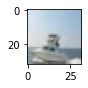

In [4]:
print('Category: ', train_labels[100])
plt.figure(figsize = (1, 1))
plt.imshow(train_images[100])
plt.show()

# Step 1-2

In [5]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import
with open('utilities.py', 'w') as f:
  f.write(r.text)

# Step 1-3

In [7]:
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

import numpy as np

from utilities import train_model

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 128
BATCH_SIZE = 32

In [9]:
# Load training dataset into a single batch to compute mean and stddev.
transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data = next(iter(trainloader))
mean = data[0].mean()
stddev = data[0].std()

Files already downloaded and verified


# Step 1-4

In [10]:
# Load and standardize training and test dataset.
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean, stddev)
                                ])

trainset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)
testset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [11]:
# Model with 2 convolutional and 1 fully-connected layer.
model = nn.Sequential(
    nn.Conv2d(3, 64, 5, stride = 2, padding = 2), # Output is 64x16x16
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, stride = 2, padding = 1), # Output is 64x8x8
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(64 * 8 * 8, 10)
)

# Step 1-5

In [12]:
# Retrieve layers for custom weight initialization.
layers = next(model.modules())
conv_layer0 = layers[0]
conv_layer1 = layers[2]
output_layer = layers[5]

# Kaiming (He) initialization.
nn.init.kaiming_normal_(conv_layer0.weight)
nn.init.constant_(conv_layer0.bias, 0.0)
nn.init.kaiming_normal_(conv_layer1.weight)
nn.init.constant_(conv_layer1.bias, 0.0)

# Xavier (Glorot) initialization.
nn.init.xavier_uniform_(output_layer.weight)
nn.init.constant_(output_layer.bias, 0.0)

# Loss function and optimizer
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

# Train the model
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

Epoch 1/128 loss: 1.4011 - acc: 0.5085 - val_loss: 1.0581 - val_acc: 0.6353
Epoch 2/128 loss: 1.0616 - acc: 0.6279 - val_loss: 0.8796 - val_acc: 0.6960
Epoch 3/128 loss: 0.9247 - acc: 0.6800 - val_loss: 0.7547 - val_acc: 0.7431
Epoch 4/128 loss: 0.8170 - acc: 0.7145 - val_loss: 0.6778 - val_acc: 0.7663
Epoch 5/128 loss: 0.7391 - acc: 0.7413 - val_loss: 0.5854 - val_acc: 0.7986
Epoch 6/128 loss: 0.6675 - acc: 0.7663 - val_loss: 0.5353 - val_acc: 0.8170
Epoch 7/128 loss: 0.6110 - acc: 0.7837 - val_loss: 0.4713 - val_acc: 0.8378
Epoch 8/128 loss: 0.5558 - acc: 0.8041 - val_loss: 0.4359 - val_acc: 0.8525
Epoch 9/128 loss: 0.5112 - acc: 0.8181 - val_loss: 0.3855 - val_acc: 0.8695
Epoch 10/128 loss: 0.4655 - acc: 0.8347 - val_loss: 0.3637 - val_acc: 0.8737
Epoch 11/128 loss: 0.4291 - acc: 0.8479 - val_loss: 0.3316 - val_acc: 0.8829
Epoch 12/128 loss: 0.3949 - acc: 0.8579 - val_loss: 0.2906 - val_acc: 0.9003
Epoch 13/128 loss: 0.3633 - acc: 0.8695 - val_loss: 0.2679 - val_acc: 0.9054
Epoch 14

[0.9759077095329495, 0.9802463211772233]